In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
ir = load_iris()
dir(ir)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(ir.data)

In [11]:
ir.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
df.drop([0,1],axis='columns')

,2,3
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'Income($)')

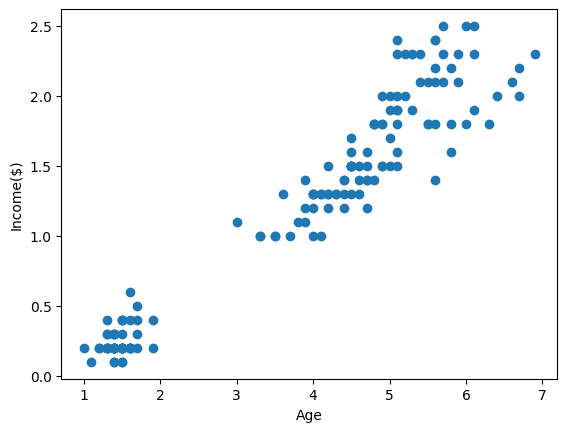

In [23]:
plt.scatter(df[2],df[3])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [25]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[[2,3]])
    sse.append(km.inertia_)


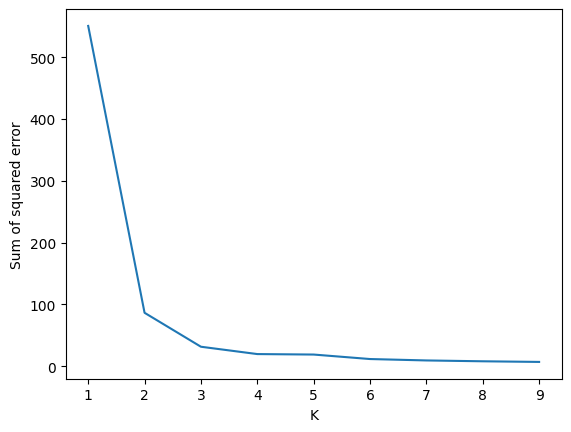

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [38]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[[2,3]])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [39]:
df['cluster']=y_predicted


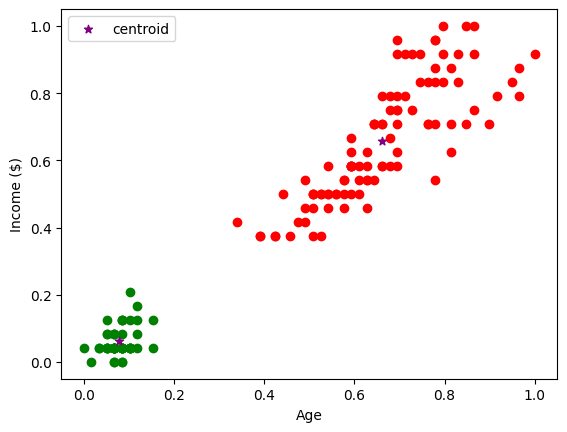

In [41]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1[2],df1[3],color='green')
plt.scatter(df2[2],df2[3],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [37]:
scaler = MinMaxScaler()

scaler.fit(df[[3]])
df[3] = scaler.transform(df[[3]])

scaler.fit(df[[2]])
df[2] = scaler.transform(df[[2]])